In [9]:
%matplotlib notebook
#calling it a second time may prevent some graphics error
%matplotlib notebook


# 2D simulation profile


In [10]:
from datetime import datetime, timedelta
import numpy as np
from opendrift.models.oceandrift import OceanDrift

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

17:23:47 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.6.0)
17:23:47 WARNING opendrift.models.basemodel: ##################################################################################
17:23:47 WARNING opendrift.models.basemodel: Dependencies are outdated, please update with: conda env update -f environment.yml
17:23:47 WARNING opendrift.models.basemodel: ##################################################################################


Disable any 3D motion



In [11]:
o.disable_vertical_motion()

17:23:47 INFO    opendrift.models.oceandrift: Setting config: drift:vertical_advection -> False
17:23:47 INFO    opendrift.models.oceandrift: Setting config: drift:vertical_mixing -> False


Define some constant current, wind and Stokes drift



In [12]:
o.set_config('environment:fallback:x_wind', 7)
o.set_config('environment:fallback:x_sea_water_velocity', .1)
o.set_config('environment:fallback:sea_surface_wave_stokes_drift_x_velocity', .2)
o.set_config('environment:fallback:sea_surface_wave_significant_height', 2)
o.set_config('environment:fallback:sea_surface_wave_period_at_variance_spectral_density_maximum', 8)

Seed elements between surface and 5m depth



In [13]:
time = datetime.utcnow()
z = -np.linspace(0, 5, 50)
o.seed_elements(lon=4.5, lat=60.0, z=z, radius=0, number=len(z), time=time)

Running model for 6 hours



In [14]:
o.run(duration=timedelta(hours=6), time_step=600)

17:23:52 INFO    opendrift.models.basemodel: Fallback values will be used for the following variables which have no readers: 
17:23:52 INFO    opendrift.models.basemodel: 	x_sea_water_velocity: 0.100000
17:23:52 INFO    opendrift.models.basemodel: 	y_sea_water_velocity: 0.000000
17:23:52 INFO    opendrift.models.basemodel: 	x_wind: 7.000000
17:23:52 INFO    opendrift.models.basemodel: 	y_wind: 0.000000
17:23:52 INFO    opendrift.models.basemodel: 	upward_sea_water_velocity: 0.000000
17:23:52 INFO    opendrift.models.basemodel: 	ocean_vertical_diffusivity: 0.000000
17:23:52 INFO    opendrift.models.basemodel: 	sea_surface_wave_significant_height: 2.000000
17:23:52 INFO    opendrift.models.basemodel: 	sea_surface_wave_stokes_drift_x_velocity: 0.200000
17:23:52 INFO    opendrift.models.basemodel: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
17:23:52 INFO    opendrift.models.basemodel: 	sea_surface_wave_period_at_variance_spectral_density_maximum: 8.000000
17:23:52 INFO    opendrift

To check that z is really kept constant for all particles



<IPython.core.display.Javascript object>


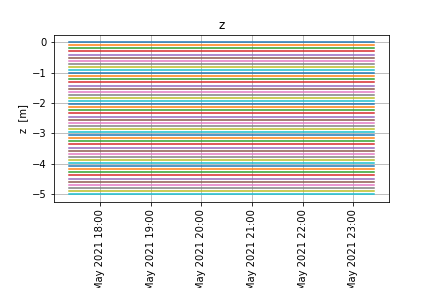

In [15]:
o.plot_property('z')

Vertical profile of advection. Note the decaying importance of Stokes drift, and the additional windage of the element at surface



<IPython.core.display.Javascript object>


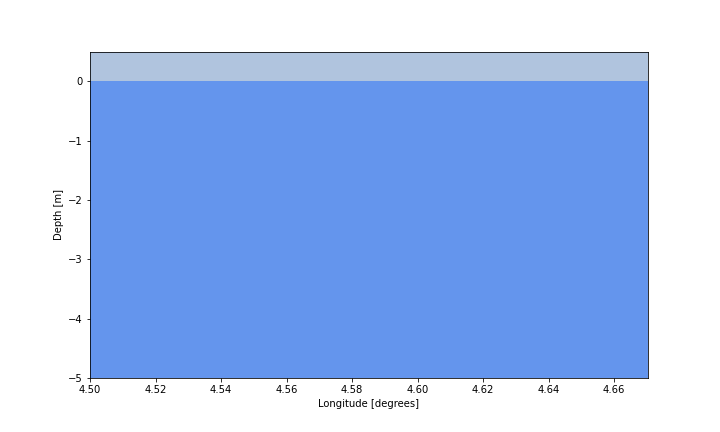

In [17]:
o.animation_profile()

<img src="file://gallery/animations/example_2d_0.gif">

